```
The main entry point for cardiovascular disease 
Amer Ahmed
Amir Ramic
Supervisor: Joakim Wassberg
Version: 0.0.1
```

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('./Datasets/heart_disease.csv', sep=';')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Modified  age

In [5]:
data['age'] = round(data['age']/365.25,2).astype('int')

There is no duplicated

In [6]:
data.duplicated().sum()

0

In [8]:
data.insert(3, "female", (data['gender']==1).astype(int))
data.insert(4, 'male', (data['gender']==2).astype(int))
data.drop(['gender', 'id'], axis=1, inplace=True)


In [9]:
data.insert(5, 'bmi', round((data['weight']/(data['height']/100)**2), 2))

In [10]:
data.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.807329,0.650429,0.349571,164.359229,74.205690,27.556545,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.762506,0.476838,0.476838,8.210126,14.395757,6.091405,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,0.000000,165.000000,72.000000,26.375000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,1.000000,170.000000,82.000000,30.220000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.drop(data.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [12]:
def bp_categorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None

data.insert(8, "bp_cat", data.apply(lambda row: bp_categorize(row['ap_hi'], row['ap_lo']), axis=1))
data['bp_cat'].value_counts()

normal      39008
high 1      15380
high 2      15023
elevated      419
high 3         77
Name: bp_cat, dtype: int64

In [14]:
data.drop(data.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [15]:
data.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


In [16]:
base_color = sns.color_palette()[0]

In [17]:
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

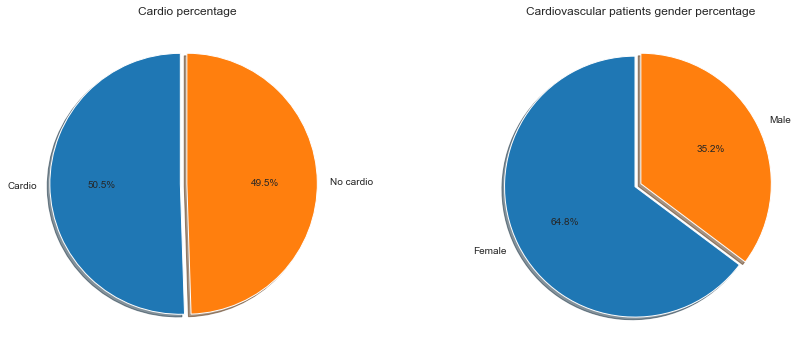

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=data['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = data.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')

Text(0.5, 70.0, '')

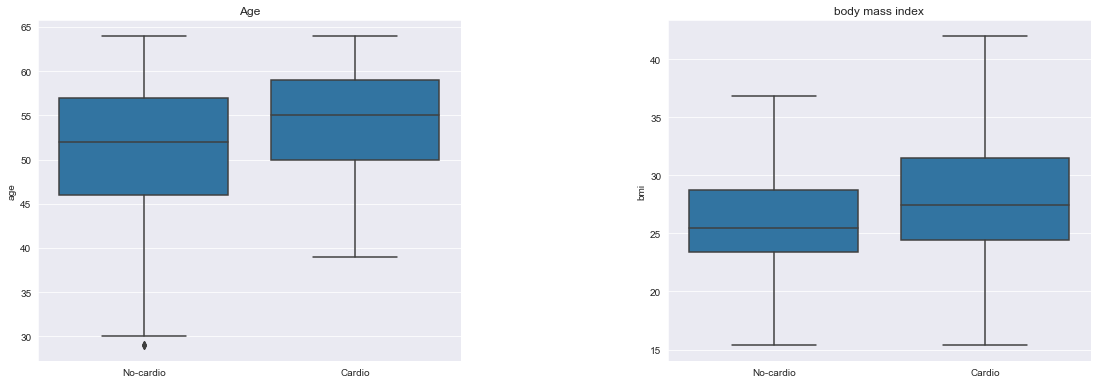

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sns.boxplot(data=data, x='cardio', y='age', ax=ax[0], color=base_color)
sns.boxplot(data=data, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")

[Text(155.125, 0.5, 'Cardio Percentage'),
 Text(155.125, 0.5, 'Cardio Percentage')]

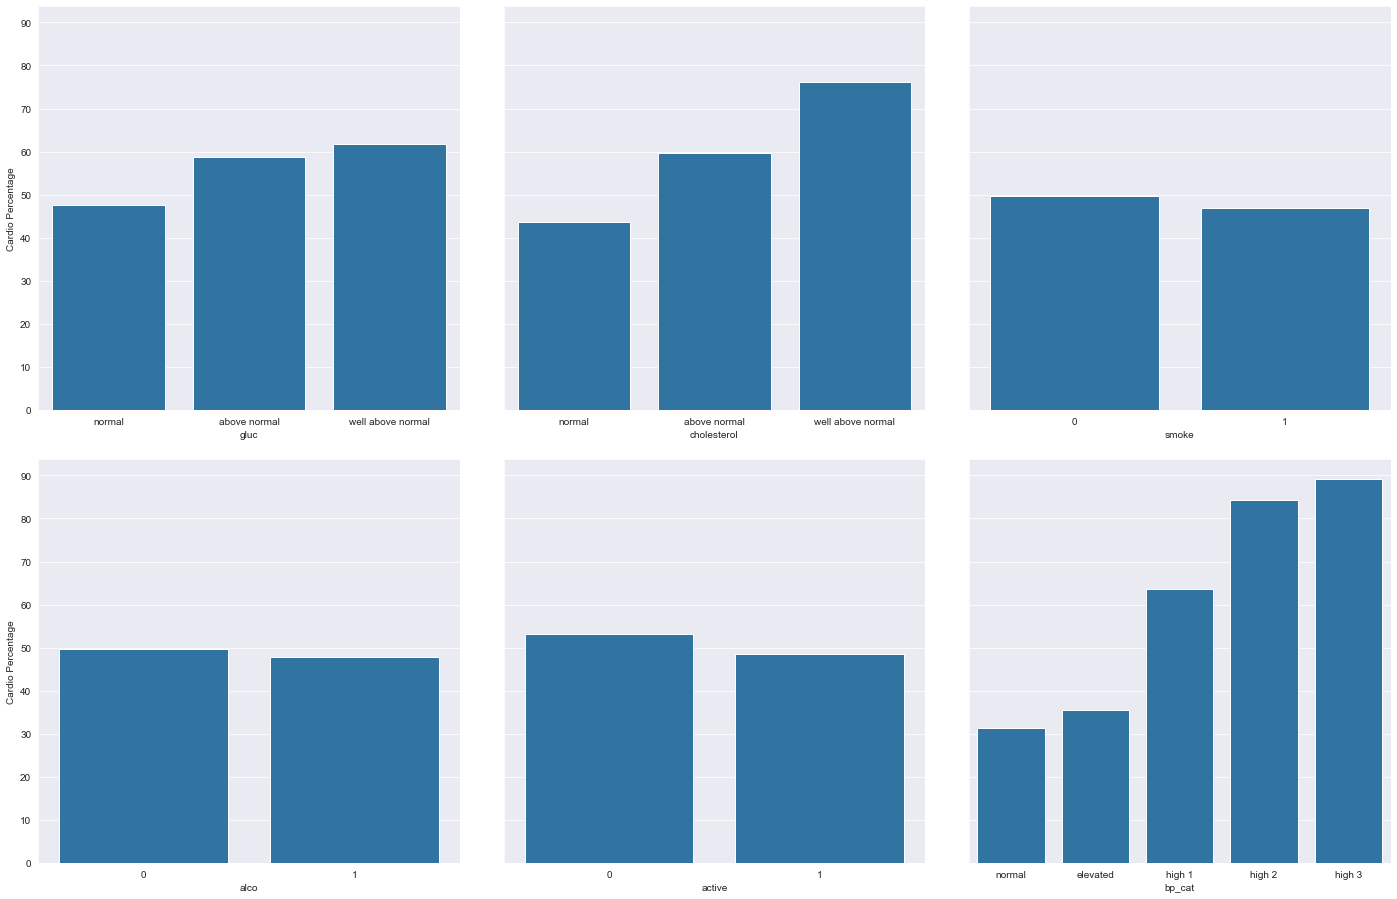

In [20]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,13), sharey=True)
plt.tight_layout(pad=3)


df_gluc = data.groupby('gluc').mean()
sns.barplot(data=df_gluc, x=df_gluc.index, y='cardio', ax=ax[0][0], color=base_color)
ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])
ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
ax[0][0].set_yticklabels(np.arange(0, 120, 10))

df_cholesterol = data.groupby('cholesterol').mean()
sns.barplot(data=df_cholesterol, x=df_cholesterol.index, y='cardio', ax=ax[0][1], color=base_color)
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

df_smoke = data.groupby('smoke').mean()
sns.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0][2], color=base_color)

df_alco = data.groupby('alco').mean()
sns.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1][0], color=base_color)

df_active = data.groupby('active').mean()
sns.barplot(data=df_active, x=df_active.index, y='cardio', ax=ax[1][1], color=base_color)

df_bp = data.groupby('bp_cat').mean()
sns.barplot(data=df_bp, x=df_bp.index, y='cardio', ax=ax[1][2], color=base_color,
           order=['normal', 'elevated', 'high 1', 'high 2', 'high 3'])
plt.setp(ax[:, :], ylabel='')
plt.setp(ax[:, 0], ylabel='Cardio Percentage')

Probability that a person has cardio diseases given that he is 50 or older

In [21]:
data_age_50 = data.query('age >=50')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

55.42

Probability that a person has cardio diseases given that he has body mass index greater than 37.

In [22]:
data_bmi37 = data.query('bmi >=37')
data_bmi37_cardio = data_bmi37.query('cardio ==1')
round(data_bmi37_cardio.shape[0]*100/data_bmi37.shape[0],2)

68.78

Probability that a person has cardio diseases given that the patient has a hypertensive crisis.

In [23]:
data_high3 = data.query("bp_cat == 'high 3'")
data_high_cardio = data_high3.query('cardio == 1')
round(data_high_cardio.shape[0]*100/data_high3.shape[0],2)

89.29

Probability that a person drinks alcohol or smokes.

In [24]:
data_alcohol_smoke = data.query("alco==1 or smoke==1")
print(data_alcohol_smoke.shape[0]*100/data.shape[0])

11.524964689779694


Probability that a person has cardio diseases given that the patient drinks alcohol or smokes.

In [25]:
data_alcohol_smoke_cardio = data_alcohol_smoke.query('cardio==1')
data_alcohol_smoke_cardio.shape[0]*100/data_alcohol_smoke.shape[0]

47.95957043588124

Probability that a person has cardio diseases given that the patient is not active.

In [26]:
data_not_active = data.query('active==0')
data_not_active_cardio = data_not_active.query('cardio==1')
data_not_active_cardio.shape[0]*100/data_not_active.shape[0]

53.27213503109269

Heatmap with correlations.

<AxesSubplot:>

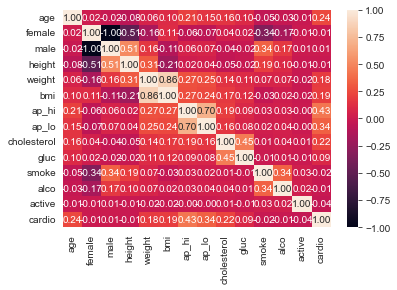

In [27]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')